In [ ]:
#Student Name: Liguangxuan He
#Student ID: 1006141809
#Instructor Name: Prof. Shion Guha
#Course Code: INF2178
#Course Name: Experimental Design for Data Science
#Program: Master of Information
#Faculty: Faculty of Information
#School: University of Toronto

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [94]:
#read excel from drive
file_path = '/content/drive/MyDrive/Inf2178 Assignment/Technical 1/INF2178_A1_data.xlsx'
data = pd.read_excel(file_path, sheet_name = 'data')
#display first 6 rows
data.head(6)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN


In [95]:
#check basic information about the data such as column names, data types, non-null counts.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

From the previous, we can see the program_name has some missing values, and so does program_model, overnight_service_type, and program_area, where we need to fill them with "Not specified".
Note that for capacity of actual bed and room, occupied beds and rooms, they add up to capacity type which is 50944 (32399+18545).

In [96]:
#adjust the changes by refilling with placeholder "Not Specified" other than the common value.
data['PROGRAM_NAME'].fillna('Not Specified', inplace = True)
data['PROGRAM_MODEL'].fillna('Not Specified', inplace = True)
data['OVERNIGHT_SERVICE_TYPE'].fillna('Not Specified', inplace = True)
data['PROGRAM_AREA'].fillna('Not Specified', inplace = True)
#I think program_id is no use, therefore I want to change it to string, so future it won't get mixed up with numerical values
data['PROGRAM_ID'] = data['PROGRAM_ID'].astype(str)

print(data.info())
#get info about descriptive states for numerical columns
print(round(data.describe(), 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  object        
 3   PROGRAM_NAME            50944 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50944 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50944 non-null  object        
 7   PROGRAM_AREA            50944 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

Now, we have the unknown values being refill with placeholders, I wanted to create a loop that iteraates over the columns in the DataFrame which are of data type 'object' because I wasnto see the categorical variables or stings contain in those columns.

In [97]:
#check categories for each column
for column in data.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print("\n")

Column: ORGANIZATION_NAME
City of Toronto                                      11960
Homes First Society                                   5266
The Salvation Army of Canada                          3461
COSTI Immigrant Services                              2967
Fred Victor Centre                                    2673
Dixon Hall                                            2555
YWCA Toronto                                          1460
Good Shepherd Ministries                              1460
Christie Ossington Neighbourhood Centre               1460
Society of St.Vincent De Paul                         1460
Eva's Initiatives                                     1435
Covenant House Toronto                                1374
YMCA of Greater Toronto                               1095
The MUC Shelter Corporation                           1095
St. Felix Social Ministries Outreach                   807
Youth Without Shelter                                  730
Toronto Community Hostel      

**Exploratory data analysis (EDA)**
1. How does the occupancy of Toronto shelters change over time, and are there particular months or periods when shelter occupancy tends to be higher or lower? Additionally, what are the patterns in ocupancy for various shelter sectors (adult men, adult women, mixed adult, youth, family) throughout the year? (Trend Analysis)


In [98]:
#calculate the date range of this dataset
data['OCCUPANCY_DATE'] = pd.to_datetime(data['OCCUPANCY_DATE']) #Make sure to datetime format
#find the start date and end date
start_date = data['OCCUPANCY_DATE'].min().date()
end_date = data['OCCUPANCY_DATE'].max().date()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2021-01-01
End Date: 2021-12-31


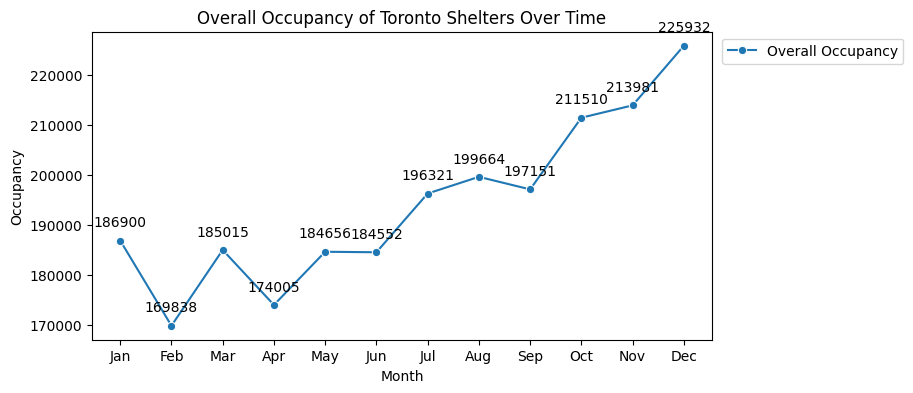

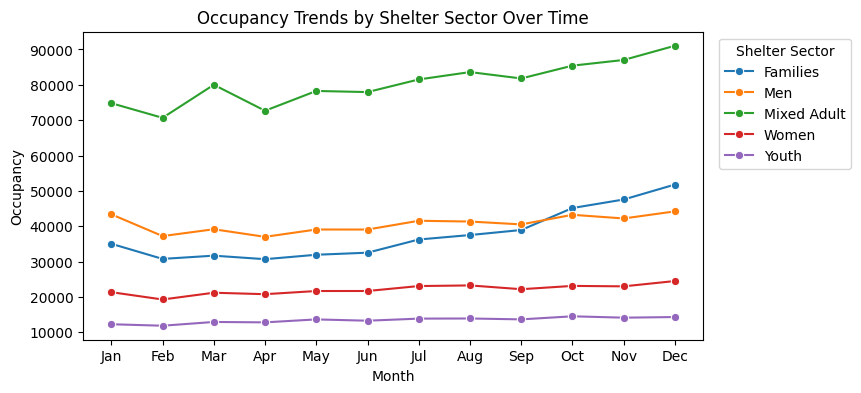

In [99]:
#extraxt the month
data['Month'] = data['OCCUPANCY_DATE'].dt.month

#calculate total occupancy per month
overall_occupancy_monthly = data.groupby(['Month'])['SERVICE_USER_COUNT'].sum().reset_index()
#calculate occupancy group by shelter sector per month
occupancy_by_sector_monthly = data.groupby(['Month', 'SECTOR'])['SERVICE_USER_COUNT'].sum().reset_index()

#plotting overall occupancy trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=overall_occupancy_monthly, x='Month', y='SERVICE_USER_COUNT', marker='o', label='Overall Occupancy')
plt.title('Overall Occupancy of Toronto Shelters Over Time')
plt.xlabel('Month')
plt.ylabel('Occupancy')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#add labels of numbers to the data points
for x, y in zip(overall_occupancy_monthly['Month'], overall_occupancy_monthly['SERVICE_USER_COUNT']):
    label = "{:.0f}".format(y) #format the label as integer
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))
plt.show()



#plotting occupancy trends by shelter sector
plt.figure(figsize = (8, 4))
sns.lineplot(data = occupancy_by_sector_monthly, x = 'Month', y = 'SERVICE_USER_COUNT', hue='SECTOR', marker='o')
plt.title('Occupancy Trends by Shelter Sector Over Time')
plt.xlabel('Month')
plt.ylabel('Occupancy')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title ='Shelter Sector', loc = 'upper right', bbox_to_anchor = (1.25, 1))
plt.show()

2. What is the prevalent overnight service type offered by shelters, and how is the distribution of shelter programs (differentiating between Emergency and Transitional) across various sectors and sercive types?  (Program Analysis)

<ipython-input-100-a50683bf49fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='OVERNIGHT_SERVICE_TYPE', palette='pastel')


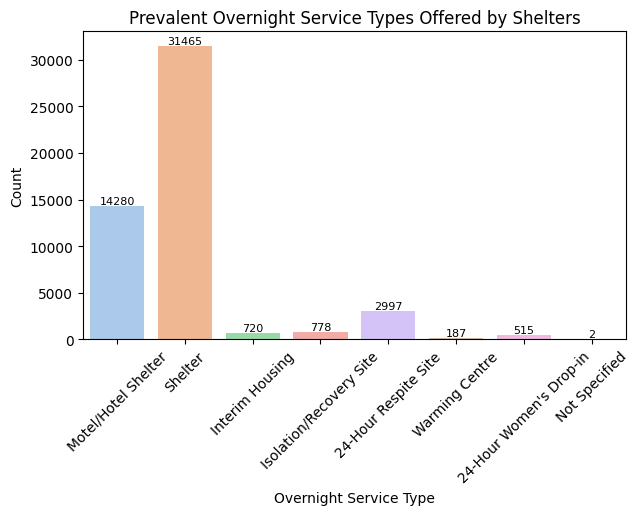

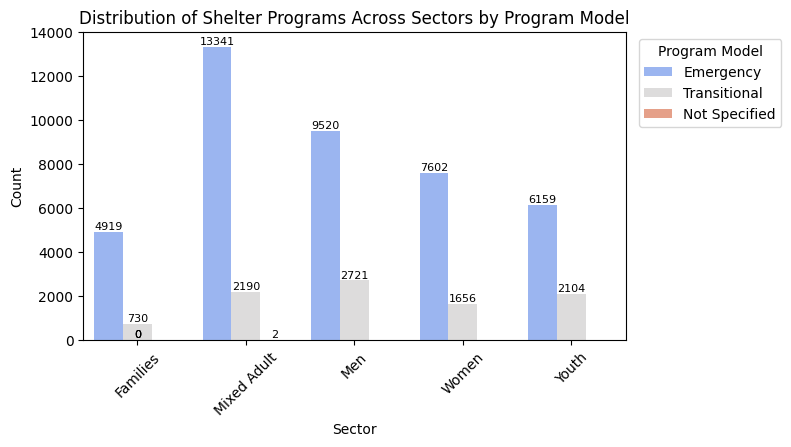

In [100]:
#prevalent overnight service type offered by shelters
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=data, x='OVERNIGHT_SERVICE_TYPE', palette='pastel')
plt.title('Prevalent Overnight Service Types Offered by Shelters')
plt.xlabel('Overnight Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

#add labels to the bars displaying the counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            ha='center', va='bottom', fontsize=8, color='black')

plt.show()

#distribution of shelter programs across sectors, differentiated by program model
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=data, x='SECTOR', hue='PROGRAM_MODEL', palette='coolwarm')
plt.title('Distribution of Shelter Programs Across Sectors by Program Model')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Program Model', bbox_to_anchor=(1.3, 1))

#add labels to the bars displaying the counts
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            ha='center', va='bottom', fontsize=8, color='black')

plt.show()

3.How does the actual capacity utilization of
beds and rooms vary across different shelter programs models.

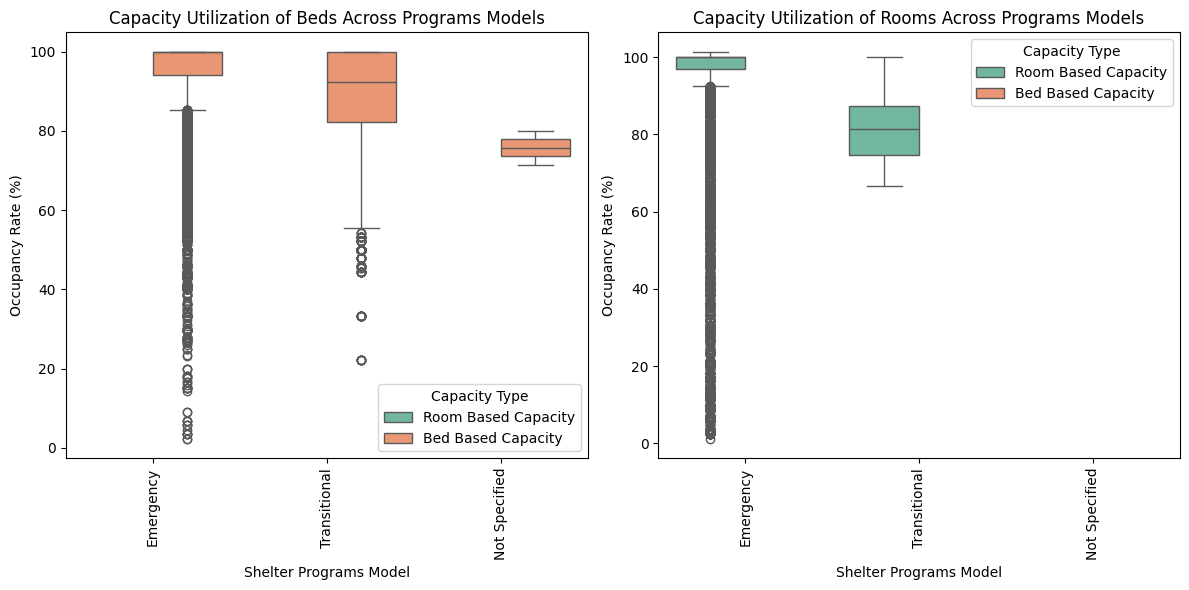

In [101]:
#calculate occupancy rates for beds and rooms
data['OCCUPANCY_RATE_BEDS'] = (data['OCCUPIED_BEDS'] / data['CAPACITY_ACTUAL_BED']) * 100
data['OCCUPANCY_RATE_ROOMS'] = (data['OCCUPIED_ROOMS'] / data['CAPACITY_ACTUAL_ROOM']) * 100

plt.figure(figsize=(12, 6))

#plotting capacity utilization by shelter program model and capacity type for beds
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='PROGRAM_MODEL', y='OCCUPANCY_RATE_BEDS', hue='CAPACITY_TYPE', palette='Set2')
plt.title('Capacity Utilization of Beds Across Programs Models')
plt.xlabel('Shelter Programs Model')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=90)
plt.legend(title='Capacity Type')

#plotting capacity utilization by shelter program model and capacity type for rooms
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='PROGRAM_MODEL', y='OCCUPANCY_RATE_ROOMS', hue='CAPACITY_TYPE', palette='Set2')
plt.title('Capacity Utilization of Rooms Across Programs Models')
plt.xlabel('Shelter Programs Model')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=90)
plt.legend(title='Capacity Type')

plt.tight_layout()
plt.show()

In [102]:
#function to calculate and print summary statistics for a given dataset
def get_summary_statistics(dataset):
    #calculate summary statistics
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    iqr = np.round(quartile_3 - quartile_1, 2)  #interquartile range

    #print summary statistics
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

#function to calculate and print summary statistics for a given program model
def get_summary_statistics_by_model(dataset, model):
    model_data = dataset[dataset['PROGRAM_MODEL'] == model]
    #print summary statistics for beds and rooms separately
    print(f'Summary statistics of occupancy rate of beds for {model} programs:')
    get_summary_statistics(model_data['OCCUPANCY_RATE_BEDS'])
    print('\n')
    print(f'Summary statistics of occupancy rate of rooms for {model} programs:')
    get_summary_statistics(model_data['OCCUPANCY_RATE_ROOMS'])
    print('\n')

#calculate summary statistics for each shelter program model
program_models = data['PROGRAM_MODEL'].unique()
for model in program_models:
    get_summary_statistics_by_model(data, model)

Summary statistics of occupancy rate of beds for Emergency programs:
Min: 2.27
Mean: 94.35
Max: 100.0
25th percentile: 94.12
Median: nan
75th percentile: 100.0
Interquartile range (IQR): 5.88


Summary statistics of occupancy rate of rooms for Emergency programs:
Min: 1.2
Mean: 93.86
Max: 101.41
25th percentile: 96.97
Median: nan
75th percentile: 100.0
Interquartile range (IQR): 3.03


Summary statistics of occupancy rate of beds for Transitional programs:
Min: 22.22
Mean: 88.52
Max: 100.0
25th percentile: 82.14
Median: nan
75th percentile: 100.0
Interquartile range (IQR): 17.86


Summary statistics of occupancy rate of rooms for Transitional programs:
Min: 66.67
Mean: 82.32
Max: 100.0
25th percentile: 74.6
Median: nan
75th percentile: 87.3
Interquartile range (IQR): 12.7


Summary statistics of occupancy rate of beds for Not Specified programs:
Min: 71.43
Mean: 75.71
Max: 80.0
25th percentile: 73.57
Median: 75.71
75th percentile: 77.86
Interquartile range (IQR): 4.29


Summary statist

t-test

In [113]:
#filter data for Emergency and Transitional program models - Beds
emergency_occupancy_beds = data[data['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE_BEDS']
transitional_occupancy_beds = data[data['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE_BEDS']

#perform independent t-test for beds
t_statistic_beds, p_value_beds = ttest_ind(emergency_occupancy_beds.dropna(), transitional_occupancy_beds.dropna(), equal_var=False)

#print t-test results for beds
print(f"T-test results for Emergency and Transitional programs - Beds:")
print(f"  - t-statistic = {t_statistic_beds}")
print(f"  - p-value = {p_value_beds}")

#check for statistical significance - Beds
alpha = 0.05
if p_value_beds < alpha:
    print("There is a significant difference in beds occupancy rates between Emergency and Transitional programs.")
else:
    print("There is no significant difference in beds occupancy rates between Emergency and Transitional programs.")

#filter data for Emergency and Transitional program models - Rooms
emergency_occupancy_rooms = data[data['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE_ROOMS']
transitional_occupancy_rooms = data[data['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE_ROOMS']

#perform independent t-test for rooms
t_statistic_rooms, p_value_rooms = ttest_ind(emergency_occupancy_rooms.dropna(), transitional_occupancy_rooms.dropna(), equal_var=False)

#print t-test results for rooms
print(f"\nT-test results for Emergency and Transitional programs - Rooms:")
print(f"  - t-statistic = {t_statistic_rooms}")
print(f"  - p-value = {p_value_rooms}")

#check for statistical significance - Rooms
if p_value_rooms < alpha:
    print("There is a significant difference in rooms occupancy rates between Emergency and Transitional programs.")
else:
    print("There is no significant difference in rooms occupancy rates between Emergency and Transitional programs.")


T-test results for Emergency and Transitional programs - Beds:
  - t-statistic = 36.78483679745318
  - p-value = 7.273950955963105e-283
There is a significant difference in beds occupancy rates between Emergency and Transitional programs.

T-test results for Emergency and Transitional programs - Rooms:
  - t-statistic = 31.71080126309496
  - p-value = 4.425201973982312e-150
There is a significant difference in rooms occupancy rates between Emergency and Transitional programs.
